In [1]:
import pandas as pd
import re
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json"

In [3]:
df=pd.read_json(url,lines=True)

In [4]:
df

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [5]:
id=[]
for i in df["_id"]:
    id.append(re.sub(r".*'\$oid': '([^']+)'.*", r'\1',str(i)))
df["_id"]=id

In [6]:
df.head()

,_id,student_id,class_id,scores
0,50b59cd75bed76f46522c34e,0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,50b59cd75bed76f46522c34f,0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,50b59cd75bed76f46522c350,0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,50b59cd75bed76f46522c351,0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,50b59cd75bed76f46522c352,0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."


In [7]:
Quiz=[]
Exam=[]
Homework=[]

for  i in range(0,len(df["scores"])):
    quiz=[]
    exam=[]
    homework=[]
    for j in range(0,len(df["scores"][i])):
        if df["scores"][i][j]['type']=="quiz":
            quiz.append(df["scores"][i][j]['score'])
        elif df["scores"][i][j]['type']=="exam":
            exam.append(df["scores"][i][j]['score'])
        elif df["scores"][i][j]['type']=="homework":
            homework.append(df["scores"][i][j]['score'])
    Quiz.append(round(np.mean(quiz),2))
    Exam.append(round(np.mean(exam),2))
    Homework.append(round(np.mean(homework),2))        

In [8]:
print(len(Quiz),len(Exam),len(Homework))

280 280 280


In [9]:
dataset=pd.DataFrame({"id":df["_id"],"student_id":df["student_id"],"class_id":df["class_id"],"Quiz":Quiz,"Exam":Exam,"Homework":Homework})

In [10]:
dataset

,id,student_id,class_id,Quiz,Exam,Homework
0,50b59cd75bed76f46522c34e,0,2,21.25,57.93,51.65
1,50b59cd75bed76f46522c34f,0,28,78.44,39.18,48.94
2,50b59cd75bed76f46522c350,0,5,79.29,88.23,37.29
3,50b59cd75bed76f46522c351,0,16,47.59,59.18,51.12
4,50b59cd75bed76f46522c352,0,24,28.63,4.44,85.35
...,...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,88.30,19.76,30.80
276,50b59cd75bed76f46522c462,48,14,6.84,66.79,84.03
277,50b59cd75bed76f46522c463,48,8,77.95,87.50,60.19
278,50b59cd75bed76f46522c464,48,15,26.63,17.49,52.28


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          280 non-null    object 
 1   student_id  280 non-null    int64  
 2   class_id    280 non-null    int64  
 3   Quiz        280 non-null    float64
 4   Exam        280 non-null    float64
 5   Homework    280 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 13.3+ KB


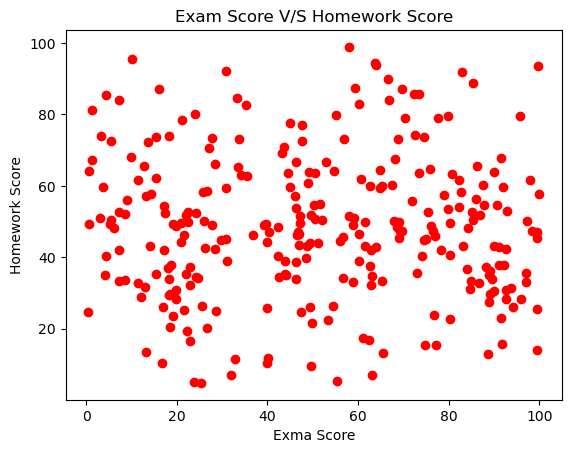

In [12]:
x=dataset.Exam
y=dataset.Homework
plt.title("Exam Score V/S Homework Score")
plt.xlabel("Exma Score")
plt.ylabel("Homework Score")
plt.scatter(x,y,color="r")